Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


Reading the Dataset

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Impute missing values in 'total_bedrooms' with median

In [ ]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

<ipython-input-6-50aa63ad82fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


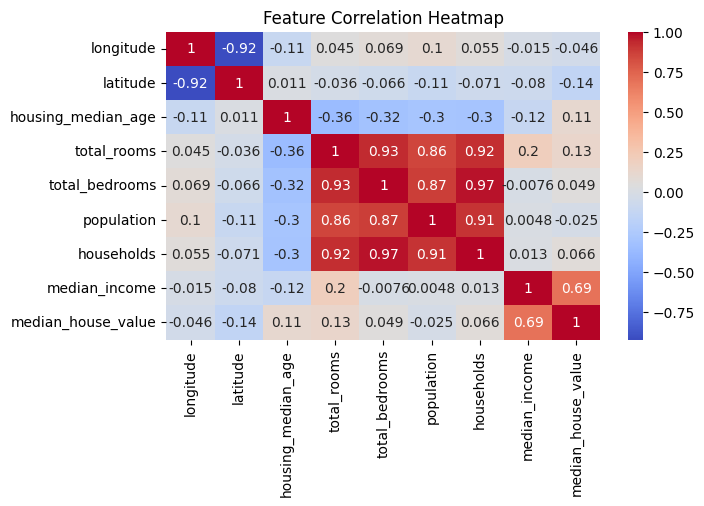

In [ ]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

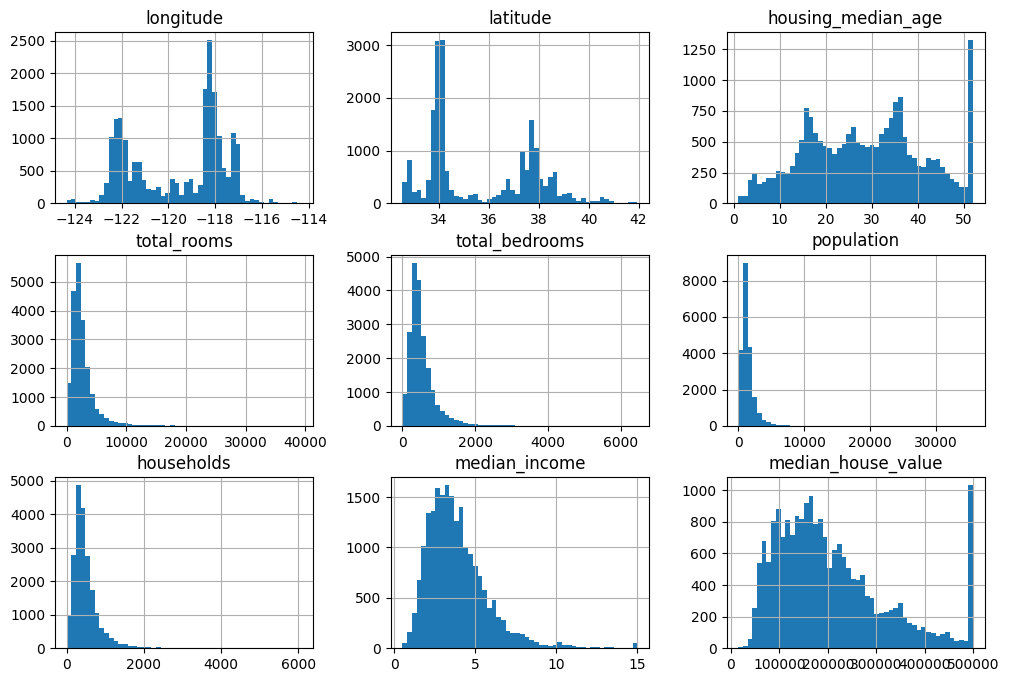

In [ ]:
df.hist(figsize=(12, 8), bins=50)
plt.show()

One-Hot Encoding for 'ocean_proximity'

In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)


In [ ]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

In [ ]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df.drop(columns=["total_rooms", "total_bedrooms", "population"], inplace=True)

In [ ]:
print(df.head())

   longitude  latitude  housing_median_age  households  median_income  \
0    -122.23     37.88                41.0       126.0         8.3252   
1    -122.22     37.86                21.0      1138.0         8.3014   
2    -122.24     37.85                52.0       177.0         7.2574   
3    -122.25     37.85                52.0       219.0         5.6431   
4    -122.25     37.85                52.0       259.0         3.8462   

   median_house_value  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0            452600.0                   False                   False   
1            358500.0                   False                   False   
2            352100.0                   False                   False   
3            341300.0                   False                   False   
4            342200.0                   False                   False   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  rooms_per_household  \
0                      True               

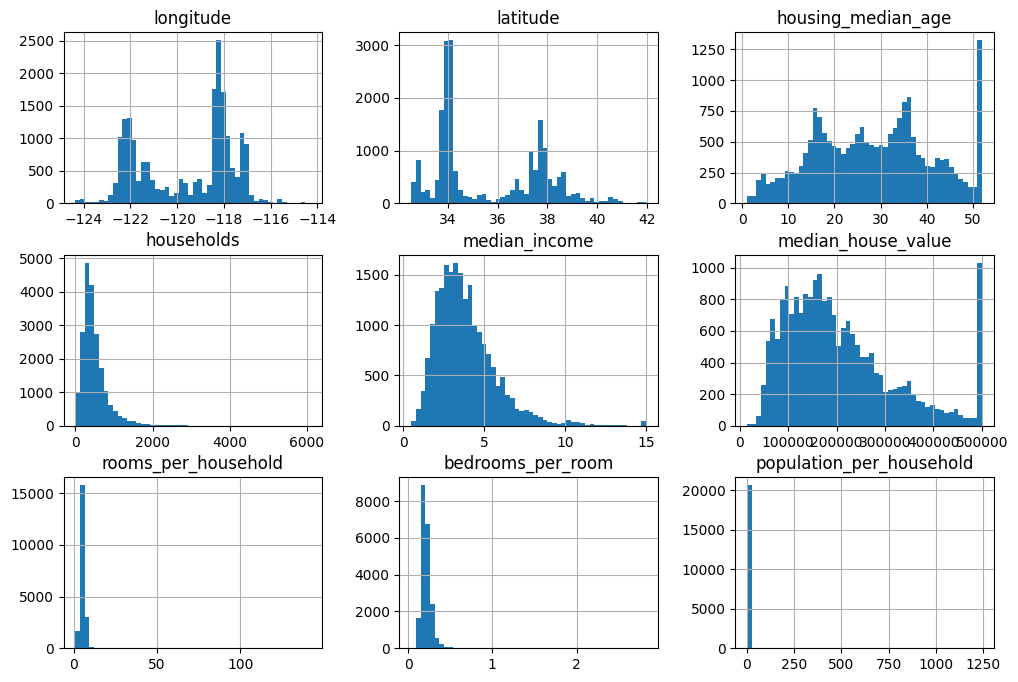

In [ ]:
df.hist(figsize=(12, 8), bins=50)
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
num_features = ["rooms_per_household", "bedrooms_per_room", "population_per_household", "median_income"]
pt = PowerTransformer(method="yeo-johnson")
df[num_features] = pt.fit_transform(df[num_features])

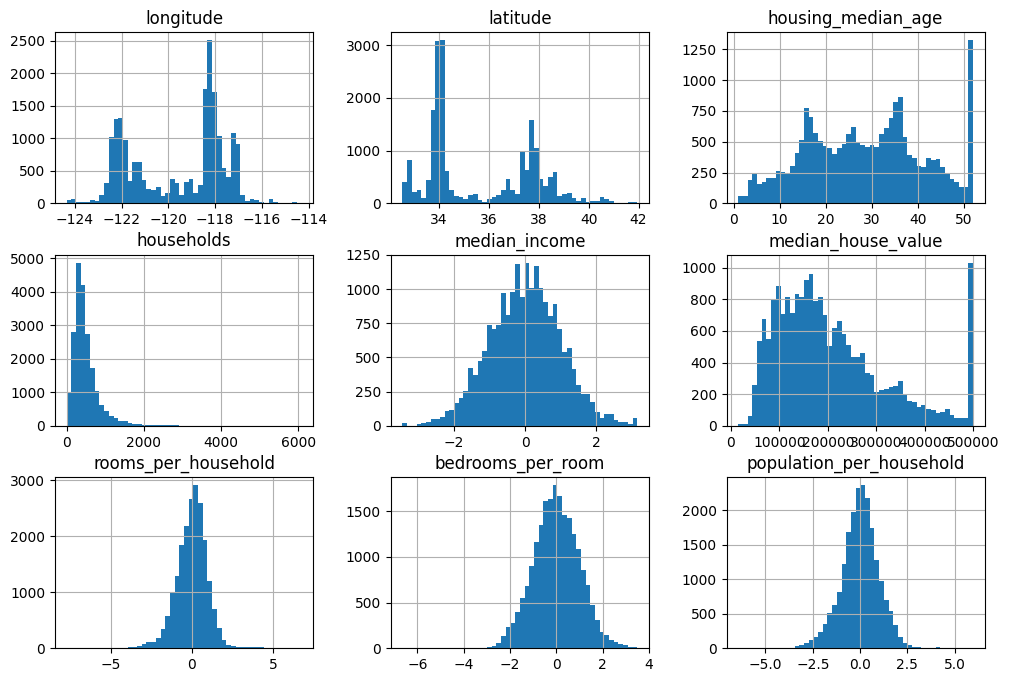

In [ ]:
df.hist(figsize=(12, 8), bins=50)
plt.show()

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,2.064000e+04,2.064000e+04,2.064000e+04
mean,-119.569704,35.631861,28.639486,499.539680,5.673326e-16,206855.816909,-6.058892e-17,-1.652425e-17,-3.917624e-16
std,2.003532,2.135952,12.585558,382.329753,1.000024e+00,115395.615874,1.000024e+00,1.000024e+00,1.000024e+00
min,-124.350000,32.540000,1.000000,1.000000,-3.446085e+00,14999.000000,-7.715859e+00,-6.650560e+00,-6.437977e+00
25%,-121.800000,33.930000,18.000000,280.000000,-6.709354e-01,119600.000000,-5.638984e-01,-6.552401e-01,-5.790413e-01
50%,-118.490000,34.260000,29.000000,409.000000,2.099591e-02,179700.000000,6.631219e-02,-1.313987e-02,2.750554e-02
75%,-118.010000,37.710000,37.000000,605.000000,6.677096e-01,264725.000000,6.042944e-01,6.699981e-01,6.144620e-01
max,-114.310000,41.950000,52.000000,6082.000000,3.146571e+00,500001.000000,6.736911e+00,3.498157e+00,5.969823e+00


Split data into 80% training and 20% testing

In [ ]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (16512, 12)
Testing Set Shape: (4128, 12)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

In [ ]:
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use scaled data for selective models (others work fine without scaling)
    if name == ["Linear Regression", "Support Vector Regression", "KNN Regressor", "Neural Network (MLP)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

    print(f"{name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")


Training Linear Regression...
Linear Regression Performance:
  MAE: 53587.11
  RMSE: 71367.86
  R² Score: 0.6113

Training Decision Tree...
Decision Tree Performance:
  MAE: 43457.86
  RMSE: 70970.02
  R² Score: 0.6156

Training Random Forest...
Random Forest Performance:
  MAE: 32065.69
  RMSE: 50015.28
  R² Score: 0.8091

Training XGBoost...
XGBoost Performance:
  MAE: 30329.33
  RMSE: 46295.25
  R² Score: 0.8364

Training Gradient Boosting...
Gradient Boosting Performance:
  MAE: 36525.28
  RMSE: 53449.47
  R² Score: 0.7820

Training Support Vector Regression...
Support Vector Regression Performance:
  MAE: 87382.10
  RMSE: 117291.65
  R² Score: -0.0499

Training KNN Regressor...
KNN Regressor Performance:
  MAE: 77598.54
  RMSE: 102639.67
  R² Score: 0.1961

Training Neural Network (MLP)...
Neural Network (MLP) Performance:
  MAE: 43661.72
  RMSE: 62058.31
  R² Score: 0.7061


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nFinal Model Performance Comparison:\n", results_df)


Final Model Performance Comparison:
                                     MAE           RMSE  R2 Score
Linear Regression          53587.108169   71367.863319  0.611314
Decision Tree              43457.863857   70970.023011  0.615636
Random Forest              32065.694552   50015.282408  0.809103
XGBoost                    30329.325107   46295.253665  0.836444
Gradient Boosting          36525.279404   53449.467999  0.781988
Support Vector Regression  87382.099281  117291.651174 -0.049850
KNN Regressor              77598.542490  102639.674900  0.196060
Neural Network (MLP)       43661.721840   62058.307125  0.706104


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the base model
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [3, 5, 7],  # Tree depth
    "learning_rate": [0.01, 0.1, 0.2],  # Step size
    "subsample": [0.8, 1.0],  # Subsample ratio
    "colsample_bytree": [0.8, 1.0]  # Feature selection
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # Use RMSE as evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
# Best model performance on test set
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nOptimized XGBoost Performance:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")



Optimized XGBoost Performance:
  MAE: 29685.32
  RMSE: 45813.44
  R² Score: 0.8398
